In [50]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


In [68]:
path = "/Users/winni/Documents/Work/Erdos/Project/Data/expr_gene_summary.csv"
path_target = "/Users/winni/Documents/Work/Erdos/Project/Data/sample_cluster.csv"

df = pd.read_csv(path)
target = pd.read_csv(path_target)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19014 entries, 0 to 19013
Columns: 236 entries, Gene.Symbol to GSM4332889
dtypes: float64(235), object(1)
memory usage: 34.2+ MB


In [53]:
df.head()

,Gene.Symbol,GSM4332655,GSM4332656,GSM4332657,GSM4332658,GSM4332659,GSM4332660,GSM4332661,GSM4332662,GSM4332663,...,GSM4332880,GSM4332881,GSM4332882,GSM4332883,GSM4332884,GSM4332885,GSM4332886,GSM4332887,GSM4332888,GSM4332889
0,1060P11.3,4.144994,4.115674,3.810493,3.856469,3.818194,3.887695,3.980283,3.802775,3.938333,...,4.373132,4.056891,4.060475,4.015801,4.151919,4.167624,3.923671,4.022215,3.973310,3.730140
1,A1BG,13.112199,13.081583,13.174266,13.131046,13.382128,13.299655,13.251400,13.000649,13.021137,...,13.133505,13.559733,13.317278,13.221057,13.268148,13.322239,13.437879,13.210398,13.433006,13.246826
2,A1CF,11.494678,11.396567,10.597163,10.915379,11.168149,10.818883,11.070386,11.211740,11.015008,...,11.462934,11.386082,11.490042,11.400048,11.262802,11.373591,11.240902,11.430161,10.937294,11.588610
3,A2M,12.700485,13.152245,13.144225,13.328565,12.609927,13.198947,12.958865,13.519268,12.685176,...,12.792813,13.029050,12.706549,11.916571,12.898357,12.528977,13.146319,12.779290,13.477313,12.743189
4,A2ML1,3.695824,3.408949,3.496378,3.329147,3.633560,3.610388,3.561854,3.552339,3.838953,...,3.444730,3.545299,3.748974,3.515229,3.371440,3.701063,3.577060,3.515196,3.539620,3.556095


In [54]:
df.columns

Index(['Gene.Symbol', 'GSM4332655', 'GSM4332656', 'GSM4332657', 'GSM4332658',
       'GSM4332659', 'GSM4332660', 'GSM4332661', 'GSM4332662', 'GSM4332663',
       ...
       'GSM4332880', 'GSM4332881', 'GSM4332882', 'GSM4332883', 'GSM4332884',
       'GSM4332885', 'GSM4332886', 'GSM4332887', 'GSM4332888', 'GSM4332889'],
      dtype='object', length=236)

In [70]:
# Transposing the dataframe so that each row is one sample and the genes are the columns (features) 

df_temp = df.copy().set_index('Gene.Symbol')
df_T = df_temp.T
print(df_T.head())
df_T.columns


Gene.Symbol  1060P11.3       A1BG       A1CF        A2M     A2ML1   A3GALT2  \
GSM4332655    4.144994  13.112199  11.494678  12.700485  3.695824  4.244467   
GSM4332656    4.115674  13.081583  11.396567  13.152245  3.408949  4.225885   
GSM4332657    3.810493  13.174266  10.597163  13.144225  3.496378  4.142293   
GSM4332658    3.856469  13.131046  10.915379  13.328565  3.329147  4.249916   
GSM4332659    3.818194  13.382128  11.168149  12.609927  3.633560  4.178444   

Gene.Symbol    A4GALT     A4GNT      AAAS      AACS  ...    ZWILCH     ZWINT  \
GSM4332655   3.956597  5.137703  7.423348  5.792871  ...  5.289243  5.952991   
GSM4332656   3.941284  4.895462  7.345046  5.707019  ...  5.400371  5.466161   
GSM4332657   3.918220  4.932095  7.466987  5.889078  ...  6.053980  7.447844   
GSM4332658   4.222591  4.766393  7.444072  5.870297  ...  6.635309  8.577777   
GSM4332659   3.944938  4.763127  7.474469  5.924165  ...  5.786091  6.209209   

Gene.Symbol      ZXDA      ZXDB      ZXDC   

Index(['1060P11.3', 'A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT',
       'A4GNT', 'AAAS', 'AACS',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Gene.Symbol', length=19014)

In [71]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(df_T, target, random_state=123, test_size=0.2)

# PCA Model

- standard scalar
apply pca
fit data, 

maybe plot the pc's as well and see what visualization we get


predict data, calculate mses 

do i do one hot encoding? or maybe linear regression to see prediction...

In [58]:
y_train['Cluster']

192    3
89     1
10     1
53     2
211    1
      ..
98     1
220    1
66     3
126    1
109    3
Name: Cluster, Length: 188, dtype: int64

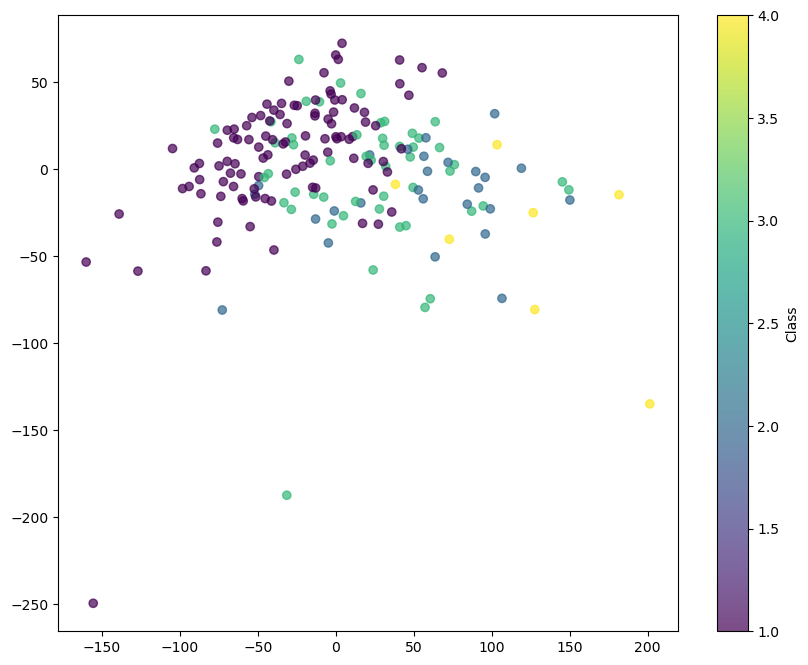

In [ ]:
# Instantiate the pipeline with scaling 

pca_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(2))
])


# Visualization with all 4 cluster groups marked
X_train_pca = pca_pipe.fit_transform(X_train)
plt.figure(figsize =(10,8))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train['Cluster'], alpha=0.7)
plt.colorbar(scatter, label='Class')

plt.show()


### Adjusting Cluster group labels
- just changing it to be 1- nonrejection 2- rejection
    - maybe look into one-hot encoding and see how that is set-up/if it helps

In [ ]:
# Changing labels into 1 for non-rejection

y_train_adjusted = y_train['Cluster'].copy()
y_train_adjusted[y_train['Cluster'] != 2] = 1

y_test_adjusted = y_test['Cluster'].copy()
y_test_adjusted[y_test['Cluster'] != 2] = 1
# print(y_train_adjusted)

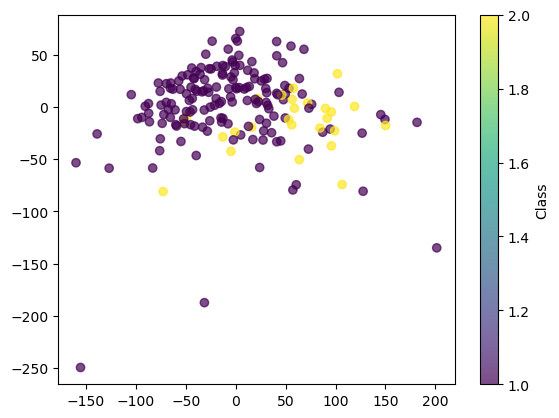

In [ ]:
# Visualizing with only the two labels

scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_adjusted, alpha=0.7)
plt.colorbar(scatter, label='Class')

plt.show()

### Logistic Regression test
trying out Logistic regression with accuracy score as metric 

need to do this properly with cross-validation and/or k-fold validation 
- after splitting into training and testing sets, is there enough of the rejection cluster present in each set to test and train properly?

can also try out linear regression and rmse's for metric testing 

In [46]:
log_pipe = Pipeline([
    ('model', LogisticRegression(max_iter=500000))
])

## X_train_pca = pca_pipe.fit_transform(X_train)
X_test_pca = pca_pipe.transform(X_test)

log_pipe.fit(X_train_pca, y_train_adjusted)

log_pred = log_pipe.predict(X_test_pca)

print('Accuracy:', accuracy_score(y_test_adjusted, log_pred))



Accuracy: 0.7659574468085106


### Scree plot to see what is ideal number of components to use for PCA

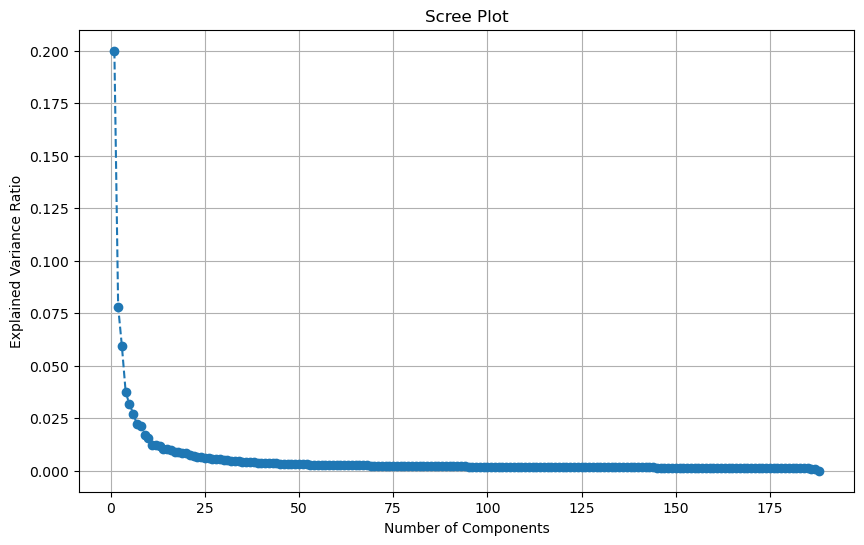

In [ ]:
pca_all = PCA()
pca_all.fit(StandardScaler().fit_transform(X_train))
explained_variance_ratio = pca_all.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# 7 components is good?

### Further considerations for models and evaluation

Dimension reduction of features in processing

Models
- Linear regression
- Logistic regression
- Decision trees
- XG Boost (making sure to not overfit)

Metrics
- accuracy
- RMSE
- precision and recall
- f1 score
- looking at false positive rate? 

#### Ideas
One idea is to build all the different models and compare them to each other to see how well they work. 


## Decision Tree (untested)

In [16]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler

# # --------------------
# # Example: features > samples
# # --------------------
# # Suppose df is your DataFrame with X = features, y = labels
# # Replace "target" with your actual target column
# y = df["target"]
# X = df.drop(columns=["target"])

# # Optional: scale numeric features (not required for trees, but good practice)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # --------------------
# # Decision Tree (simple baseline)
# # --------------------
# tree = DecisionTreeClassifier(
#     max_depth=3,         # limit depth to reduce overfitting
#     min_samples_split=5, # regularization
#     random_state=42
# )

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores_tree = cross_val_score(tree, X_scaled, y, cv=cv)

# print("Decision Tree CV Accuracy:", scores_tree.mean())

# # --------------------
# # Random Forest (stronger baseline)
# # --------------------
# rf = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=5,          # limit tree depth
#     max_features="sqrt",  # random feature selection helps with p >> n
#     random_state=42
# )

# scores_rf = cross_val_score(rf, X_scaled, y, cv=cv)

# print("Random Forest CV Accuracy:", scores_rf.mean())

# # --------------------
# # Feature Importance (from RF)
# # --------------------
# rf.fit(X_scaled, y)
# importances = pd.Series(rf.feature_importances_, index=X.columns)
# print("Top features:\n", importances.sort_values(ascending=False).head(10))
